In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
np.set_printoptions(linewidth=300)
print(x_train[0])

5


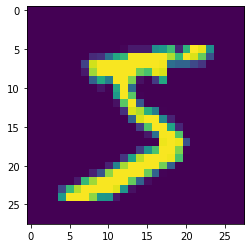

In [ ]:
plt.imshow(     x_train[0].reshape(28, 28))
print( y_train[0]   )

In [ ]:
model = keras.Sequential([
                          keras.layers.InputLayer(input_shape=(28, 28, 1)),

                          keras.layers.Conv2D(64, (3, 3)),
                          keras.layers.MaxPool2D( (2, 2) ),

                          keras.layers.Flatten(),

                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(10, activation='softmax'), 
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 flatten (Flatten)           (None, 43264)             0         
                                                                 
 dense (Dense)               (None, 32)                1384480   
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,387,882
Trainable params: 1,387,882
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 6ms/step - loss: 0.2745 - accuracy: 0.9179
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1556 - accuracy: 0.9522
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1257 - accuracy: 0.9616
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1056 - accuracy: 0.9679
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0916 - accuracy: 0.9719
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0785 - accuracy: 0.9750
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0703 - accuracy: 0.9781
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0627 - accuracy: 0.9798
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0568 - accuracy: 0.9821
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1527 - accuracy: 0.9646


[0.1527247428894043, 0.9646000266075134]

In [ ]:
model.save("test.h5")